In [1]:
# data from FoodData Central: https://fdc.nal.usda.gov/
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load cleaned branded food df
branded_food = pd.read_csv('cleaned_branded_food.csv')

print('dataframe shape:', branded_food.shape)
branded_food.head()

dataframe shape: (1162736, 8)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory
0,1105906,CAMPBELL SOUP COMPANY,NaN,"clam stock, potatoes, clams, cream, vegetable ...",Prepared Soups,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER,PREPARED FOODS/MEALS,"SOUP, STEW"
1,1105907,CAMPBELL SOUP COMPANY,NaN,"water, cream, broccoli, celery, vegetable oil ...",Prepared Soups,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI,PREPARED FOODS/MEALS,"SOUP, STEW"
2,1105909,CAMPBELL SOUP COMPANY,NaN,"water, pea beans, carrots, cooked ham - water ...",Prepared Soups,CAMPBELL'S SOUP BEAN AND HAM,PREPARED FOODS/MEALS,"SOUP, STEW"
3,1105912,CAMPBELL SOUP COMPANY,NaN,"tomato puree (water, tomato paste), water, hig...",Prepared Soups,CAMPBELL'S SOUP TOMATO,PREPARED FOODS/MEALS,"SOUP, STEW"
4,1105913,CAMPBELL SOUP COMPANY,NaN,"water, tomato puree (water, tomato paste), chi...",Dough Based Products / Meals,CAMPBELL'S PASTA SPAGHETTIOS W FRANKS,PREPARED FOODS/MEALS,DINNER


In [3]:
# load cleaned food nutrient df
food_nutrients = pd.read_csv('cleaned_food_nutrients.csv')

print('dataframe shape:', food_nutrients.shape)
food_nutrients.head()

dataframe shape: (251689, 15)


,fdc_id,"Calcium, Ca (MG)",Cholesterol (MG),Energy (KCAL),"Fatty acids, total saturated (G)","Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
0,356671,36.0,71.0,464.0,8.93,0.0,3.6,1.79,10.71,250.0,21.4,17.86,21.43,64.29,NaN
1,356672,71.0,0.0,464.0,7.14,0.0,3.6,2.14,10.71,286.0,21.4,16.07,21.43,64.29,NaN
2,356675,91.0,45.0,485.0,7.58,0.0,3.0,2.12,6.06,242.0,27.3,24.24,27.27,60.61,NaN
3,356689,18.0,45.0,250.0,1.79,0.0,0.0,1.07,10.71,286.0,1.8,16.07,1.79,17.86,NaN
4,356803,3.0,0.0,71.0,0.00,0.0,0.9,0.00,0.00,0.0,4.4,0.00,13.27,16.81,NaN


In [4]:
# join branded food and nutrition info dataframes, keep items present in both tables
brand_food_nutrients = branded_food.join(food_nutrients.set_index('fdc_id'), on='fdc_id', how='inner')

print('dataframe shape:', brand_food_nutrients.shape)
brand_food_nutrients.head()

dataframe shape: (251689, 22)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
143,1106095,DOLE PACKAGED FOODS LLC,NaN,"pineapple, water, sugar, and citric acid.",Canned Fruit,PINEAPPLE CHUNKS IN HEAVY SYRUP,"FRUITS, VEGETABLES, LEGUMES","FRUIT, VEGETABLE",0.0,0.0,...,0.0,0.9,0.15,0.43,0.0,11.5,0.00,20.09,20.94,NaN
152,1106106,MRS. FIELDS FAMOUS BRANDS LLC,NaN,"bleached wheat flour, sugar, raisins, oats, fr...",Cookies & Biscuits,"OATMEAL RAISIN WITH WALNUTS SOFTBAKED COOKIES,...",SNACKS,"COOKIES, CRACKERS",32.0,36.0,...,0.0,3.6,1.07,3.57,429.0,17.9,16.07,35.71,64.29,NaN
158,1106119,NORTH AMERICAN BAKING INC.,NaN,"enriched flour (wheat flour, niacin, reduced i...",Flavored Snack Crackers,"CHICKEN FLAVORED SNACK CRACKERS, CHICKEN",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.3,4.00,6.67,867.0,10.0,16.67,10.00,70.00,NaN
159,1106120,INTERBAKE FOODS INC.,NaN,"sugar, peanut butter (peanuts, palm oil, corn ...",Cookies & Biscuits,"FUDGE PEANUT BUTTER FILLED COOKIES, FUDGE PEAN...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.8,3.08,7.69,346.0,30.8,30.77,30.77,57.69,NaN
160,1106121,INTERBAKE FOODS INC.,NaN,"enriched wheat flour (flour, niacin, reduced i...",Cookies & Biscuits,"ORIGINAL CHOCOLATE CHIP COOKIES, ORIGINAL CHOC...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.0,3.33,3.03,242.0,30.3,27.27,30.30,66.67,NaN


In [5]:
brand_food_nutrients['category'].value_counts()

category
SNACKS                                      85525
EGGS, DAIRY, DAIRY SUBSTITUTES              55774
PREPARED FOODS/MEALS                        43835
FRUITS, VEGETABLES, LEGUMES                 19292
MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES    17453
CEREAL                                      16289
DRINKS (NON-DAIRY)                          13521
Name: count, dtype: int64

In [6]:
# look for duplicate rows
duplicates = brand_food_nutrients.duplicated(subset=['brand_owner', 'brand_name', 'ingredients', 
                                                    'description', 'Calcium, Ca (MG)', 'Cholesterol (MG)',
                                                    'Energy (KCAL)', 'Fatty acids, total saturated (G)',
                                                    'Fatty acids, total trans (G)', 'Fiber, total dietary (G)', 
                                                    'Iron, Fe (MG)', 'Protein (G)', 'Sodium, Na (MG)', 'Sugars, added (G)',
                                                    'Fat, total (G)', 'Sugars, total (G)', 'Carbohydrate, total (G)', 
                                                    'Vitamin D (UG)'], keep='last')
brand_food_nutrients[duplicates]

,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
143,1106095,DOLE PACKAGED FOODS LLC,NaN,"pineapple, water, sugar, and citric acid.",Canned Fruit,PINEAPPLE CHUNKS IN HEAVY SYRUP,"FRUITS, VEGETABLES, LEGUMES","FRUIT, VEGETABLE",0.0,0.0,...,0.0,0.9,0.15,0.43,0.0,11.5,0.00,20.09,20.94,NaN
158,1106119,NORTH AMERICAN BAKING INC.,NaN,"enriched flour (wheat flour, niacin, reduced i...",Flavored Snack Crackers,"CHICKEN FLAVORED SNACK CRACKERS, CHICKEN",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.3,4.00,6.67,867.0,10.0,16.67,10.00,70.00,NaN
159,1106120,INTERBAKE FOODS INC.,NaN,"sugar, peanut butter (peanuts, palm oil, corn ...",Cookies & Biscuits,"FUDGE PEANUT BUTTER FILLED COOKIES, FUDGE PEAN...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.8,3.08,7.69,346.0,30.8,30.77,30.77,57.69,NaN
171,1106136,TURKEY HILL DAIRY INC.,NaN,"milk, cream, sugar, corn syrup, choco chips (s...",Ice Cream & Frozen Yogurt,"CHOCO MINT CHIP PREMIUM ICE CREAM, CHOCO MINT ...","EGGS, DAIRY, DAIRY SUBSTITUTES",ICE CREAM,115.0,34.0,...,0.0,1.1,0.57,3.45,98.0,14.9,12.64,19.54,26.44,NaN
205,1106201,ASSOCIATED WHOLESALE GROCERS INC.,NaN,"pears, water, corn syrup, high fructose corn s...",Canned Fruit,PEAR HALVES IN LIGHT SYRUP,"FRUITS, VEGETABLES, LEGUMES","FRUIT, VEGETABLE",6.0,0.0,...,0.0,1.6,0.00,0.00,0.0,4.8,0.00,10.32,15.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162029,2661250,TARGET STORES,ARCHER FARMS,"almonds, vegetable oil (peanut, cottonseed, so...","Popcorn, Peanuts, Seeds & Related Snacks","SEA SALT ROASTED HEART HEALTHY ALMONDS, SEA SA...",SNACKS,"NUTS, SEEDS",286.0,0.0,...,0.0,10.7,3.57,21.43,393.0,0.0,53.57,3.57,17.86,0.0
1162281,2661637,TARGET STORES,MARKET PANTRY,"tomatoes, tomato juice, less than 2% of: salt,...",Tomatoes,PETITE DICED TOMATOES,"FRUITS, VEGETABLES, LEGUMES","FRUIT, VEGETABLE",0.0,0.0,...,0.0,0.8,0.00,0.83,149.0,0.0,0.00,2.48,4.13,0.0
1162418,2661852,TARGET STORES,MARKET PANTRY,"cultured pasteurized grade a cream, nonfat mil...",Cream,SOUR CREAM,"EGGS, DAIRY, DAIRY SUBSTITUTES","MILK, CREAM",100.0,50.0,...,0.0,0.0,0.00,3.33,50.0,0.0,16.67,3.33,3.33,0.0
1162495,2661956,TARGET STORES,ARCHER FARMS,"marshmallows (corn syrup, sugar, modified corn...","Cakes, Cupcakes, Snack Cakes","CRISPY RICE TREAT, CRISPY RICE",SNACKS,"SNACK CAKES, PASTRY",47.0,0.0,...,0.0,0.0,2.35,3.53,224.0,43.5,15.29,44.71,69.41,0.0


In [7]:
# drop duplicate rows
brand_food_nutrients.drop(labels=brand_food_nutrients[duplicates].index, axis=0, inplace=True)

print('dataframe shape:', brand_food_nutrients.shape)
brand_food_nutrients.head()

dataframe shape: (167968, 22)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
152,1106106,MRS. FIELDS FAMOUS BRANDS LLC,NaN,"bleached wheat flour, sugar, raisins, oats, fr...",Cookies & Biscuits,"OATMEAL RAISIN WITH WALNUTS SOFTBAKED COOKIES,...",SNACKS,"COOKIES, CRACKERS",32.0,36.0,...,0.0,3.6,1.07,3.57,429.0,17.9,16.07,35.71,64.29,NaN
160,1106121,INTERBAKE FOODS INC.,NaN,"enriched wheat flour (flour, niacin, reduced i...",Cookies & Biscuits,"ORIGINAL CHOCOLATE CHIP COOKIES, ORIGINAL CHOC...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.0,3.33,3.03,242.0,30.3,27.27,30.30,66.67,NaN
166,1106131,HP HOOD LLC,NaN,"milk, fudge swirl (sugar, soybean oil, cocoa p...",Ice Cream & Frozen Yogurt,BROWNIE BLAST VANILLA FROZEN DAIRY DESSERT SWI...,"EGGS, DAIRY, DAIRY SUBSTITUTES",ICE CREAM,114.0,23.0,...,0.0,1.1,1.93,4.55,142.0,18.2,10.23,23.86,34.09,NaN
169,1106134,DBC INC.,NaN,"sugar, flour (enriched wheat flour [niacin, re...",Cookies & Biscuits,"DARK CHOCOLATE CREME FILLED WAFERS, DARK CHOCO...",SNACKS,"COOKIES, CRACKERS",30.0,0.0,...,0.0,3.7,3.70,3.70,111.0,40.7,18.52,40.74,70.37,NaN
176,1106144,HARRIS-TEETER INC.,NaN,"organic prepared white beans, water, organic c...",Canned & Bottled Beans,"MAPLE BAKED BEANS, MAPLE","FRUITS, VEGETABLES, LEGUMES",LEGUMES,42.0,0.0,...,0.0,4.6,1.46,5.38,308.0,6.2,0.38,7.69,21.54,NaN


In [8]:
# look for duplicate entries that don't have matching nutrient info
# nutrient info updated in later entries, so keep last entry
duplicates2 = brand_food_nutrients.duplicated(subset=['brand_owner', 'ingredients', 'description'], keep='last')
brand_food_nutrients[duplicates2]

,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
152,1106106,MRS. FIELDS FAMOUS BRANDS LLC,NaN,"bleached wheat flour, sugar, raisins, oats, fr...",Cookies & Biscuits,"OATMEAL RAISIN WITH WALNUTS SOFTBAKED COOKIES,...",SNACKS,"COOKIES, CRACKERS",32.0,36.0,...,0.0,3.6,1.07,3.57,429.0,17.9,16.07,35.71,64.29,NaN
169,1106134,DBC INC.,NaN,"sugar, flour (enriched wheat flour [niacin, re...",Cookies & Biscuits,"DARK CHOCOLATE CREME FILLED WAFERS, DARK CHOCO...",SNACKS,"COOKIES, CRACKERS",30.0,0.0,...,0.0,3.7,3.70,3.70,111.0,40.7,18.52,40.74,70.37,NaN
176,1106144,HARRIS-TEETER INC.,NaN,"organic prepared white beans, water, organic c...",Canned & Bottled Beans,"MAPLE BAKED BEANS, MAPLE","FRUITS, VEGETABLES, LEGUMES",LEGUMES,42.0,0.0,...,0.0,4.6,1.46,5.38,308.0,6.2,0.38,7.69,21.54,NaN
194,1106170,COOPERATIVE REGIONS OF ORGANIC PRODUCER POOLS,NaN,whole organic cultured pasteurized grade a mil...,Yogurt,"VANILLA WHOLE MILK YOGURT, VANILLA","EGGS, DAIRY, DAIRY SUBSTITUTES",YOGURT,158.0,15.0,...,0.0,0.0,0.00,4.12,65.0,4.1,3.53,8.24,8.82,NaN
202,1106196,BLUE DIAMOND GROWERS,NaN,"almonds, sugar, natural blueberry flavor, corn...","Popcorn, Peanuts, Seeds & Related Snacks","BLUEBERRY FLAVORED OVEN ROASTED ALMONDS, BLUEB...",SNACKS,"NUTS, SEEDS",209.0,0.0,...,0.0,9.3,3.02,16.28,81.0,16.3,41.86,20.93,34.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162329,2661729,TARGET STORES,MARKET PANTRY,"albacore tuna, water, vegetable broth, salt, s...",Canned Tuna,"SOLID WHITE ALBACORE TUNA IN WATER, SOLID WHIT...","MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES",SEAFOOD,0.0,35.0,...,0.0,0.0,0.64,23.01,283.0,0.0,0.88,0.00,0.00,1.0
1162390,2661802,TARGET STORES,MARKET PANTRY,"light tuna, water, vegetable broth, salt.",Canned Tuna,"CHUNK LIGHT TUNA IN WATER, CHUNK LIGHT IN WATER","MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES",SEAFOOD,0.0,40.0,...,0.0,0.0,1.27,17.70,319.0,0.0,0.44,0.00,0.00,2.0
1162421,2661857,TARGET STORES,MARKET PANTRY,"cultured pasteurized grade a cream, nonfat mil...",Cream,SOUR CREAM,"EGGS, DAIRY, DAIRY SUBSTITUTES","MILK, CREAM",100.0,50.0,...,0.0,0.0,0.00,3.33,50.0,0.0,16.67,3.33,3.33,0.0
1162422,2661858,TARGET STORES,MARKET PANTRY,"cultured pasteurized grade a cream, skim milk,...",Cream,"LIGHT SOUR CREAM, LIGHT","EGGS, DAIRY, DAIRY SUBSTITUTES","MILK, CREAM",200.0,33.0,...,0.0,0.0,0.00,6.67,67.0,0.0,8.33,6.67,6.67,0.0


In [9]:
# drop duplicate rows
brand_food_nutrients.drop(labels=brand_food_nutrients[duplicates2].index, axis=0, inplace=True)

print('dataframe shape:', brand_food_nutrients.shape)
brand_food_nutrients.head()

dataframe shape: (128356, 22)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
160,1106121,INTERBAKE FOODS INC.,NaN,"enriched wheat flour (flour, niacin, reduced i...",Cookies & Biscuits,"ORIGINAL CHOCOLATE CHIP COOKIES, ORIGINAL CHOC...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.0,3.33,3.03,242.0,30.3,27.27,30.30,66.67,NaN
166,1106131,HP HOOD LLC,NaN,"milk, fudge swirl (sugar, soybean oil, cocoa p...",Ice Cream & Frozen Yogurt,BROWNIE BLAST VANILLA FROZEN DAIRY DESSERT SWI...,"EGGS, DAIRY, DAIRY SUBSTITUTES",ICE CREAM,114.0,23.0,...,0.0,1.1,1.93,4.55,142.0,18.2,10.23,23.86,34.09,NaN
314,1106400,VERMONT CREAMERY INC.,NaN,"pasteurized cultured cream, cane sugar, madaga...",Cream,CREME FRAICHE MADAGASCAR VANILLA CULTURED CREA...,"EGGS, DAIRY, DAIRY SUBSTITUTES","MILK, CREAM",54.0,125.0,...,0.0,0.0,0.00,3.57,18.0,3.6,39.29,7.14,10.71,NaN
447,1106677,MARIANI PACKING COMPANY,NaN,"bananas, coconut oil, sugar, natural banana fl...",Wholesome Snacks,"BANANA PREMIUM CHIPS, BANANA",SNACKS,"CHIPS, MUNCHIES",0.0,0.0,...,0.0,6.7,1.33,3.33,0.0,3.3,30.00,20.00,63.33,NaN
518,1106826,BLISS UNLIMITED LLC,NaN,"*coconut milk (water, *coconut, *guar gum), *a...",Other Drinks,ORGANIC COLD BREW LATTE 100% PLANT BASED DAIRY...,DRINKS (NON-DAIRY),"TEA, COFFEE",0.0,0.0,...,0.0,0.0,0.60,1.49,22.0,10.4,16.42,13.43,14.93,NaN


In [10]:
# count of nan values in each column
brand_food_nutrients.isna().sum()

fdc_id                                  0
brand_owner                          3459
brand_name                          15679
ingredients                             4
branded_food_category                   0
description                             0
category                                0
subcategory                             0
Calcium, Ca (MG)                        0
Cholesterol (MG)                        0
Energy (KCAL)                         632
Fatty acids, total saturated (G)        0
Fatty acids, total trans (G)            0
Fiber, total dietary (G)                0
Iron, Fe (MG)                           0
Protein (G)                             0
Sodium, Na (MG)                         0
Sugars, added (G)                       0
Fat, total (G)                          0
Sugars, total (G)                       0
Carbohydrate, total (G)                 0
Vitamin D (UG)                      89854
dtype: int64

In [11]:
# count of items in each category and subcategory
print(brand_food_nutrients['category'].value_counts())
brand_food_nutrients.groupby(['category'])['subcategory'].value_counts()

category
SNACKS                                      42464
EGGS, DAIRY, DAIRY SUBSTITUTES              28929
PREPARED FOODS/MEALS                        22800
FRUITS, VEGETABLES, LEGUMES                 10367
MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES     9969
CEREAL                                       6943
DRINKS (NON-DAIRY)                           6884
Name: count, dtype: int64


category                                  subcategory         
CEREAL                                    BREAKFAST CEREAL         3592
                                          OATMEAL                  2273
                                          GRANOLA                  1078
DRINKS (NON-DAIRY)                        JUICE                    2362
                                          TEA, COFFEE              1404
                                          SPORT, ENERGY DRINKS     1245
                                          SODA                     1052
                                          WATER                     513
                                          ALCOHOL                   308
EGGS, DAIRY, DAIRY SUBSTITUTES            ICE CREAM               10969
                                          CHEESE                   7613
                                          YOGURT                   6272
                                          MILK, CREAM              3772
 

In [12]:
# make some initial plots to take a look at data

In [13]:
categories = ['MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES', 
              'FRUITS, VEGETABLES, LEGUMES', 
              'EGGS, DAIRY, DAIRY SUBSTITUTES', 
              'DRINKS (NON-DAIRY)', 
              'CEREAL', 
              'SNACKS', 
              'PREPARED FOODS/MEALS']

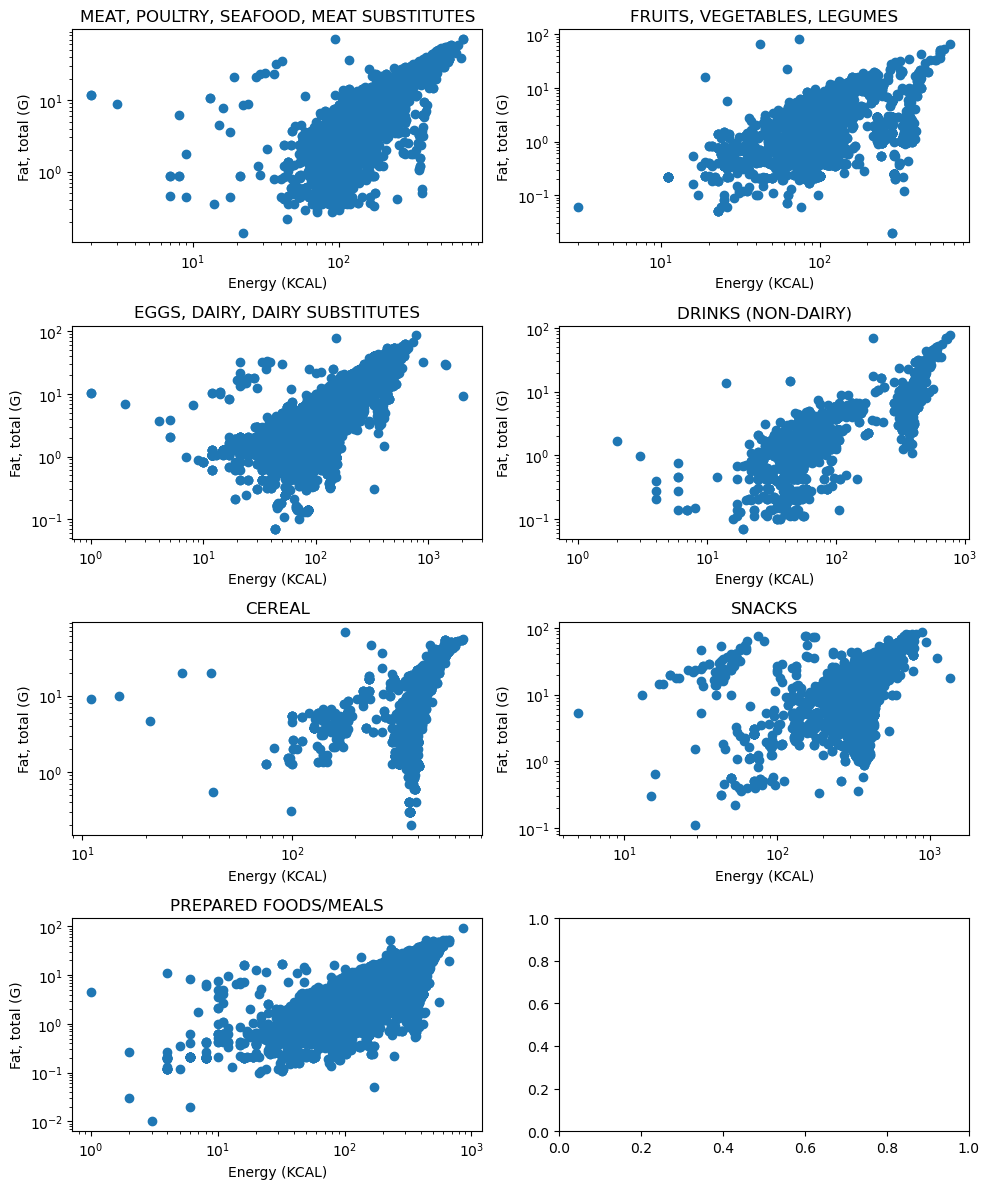

In [14]:
# plot cholesterol vs fat for 100g portion
fig, ax = plt.subplots(4, 2, figsize=(10,12))
axs = ax.ravel()

for i, cat in enumerate(categories):
    catmask = brand_food_nutrients['category'] == cat
    x = brand_food_nutrients.loc[catmask, 'Energy (KCAL)']
    y = brand_food_nutrients.loc[catmask, 'Fat, total (G)']

    axs[i].plot(x, y, 'o')
    axs[i].set_title(f'{cat}')
    axs[i].set_xlabel('Energy (KCAL)')
    axs[i].set_ylabel('Fat, total (G)')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
fig.tight_layout()

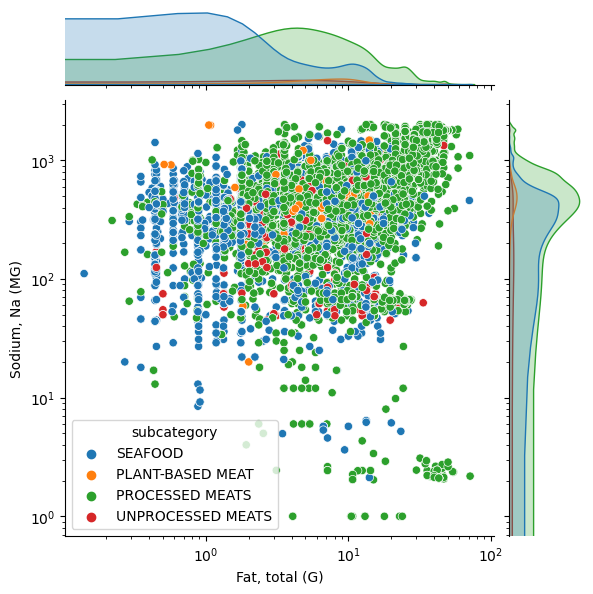

In [15]:
# MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES: Cholesterol vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Sodium, Na (MG)', hue='subcategory')
plt.xscale('log')
plt.yscale('log')

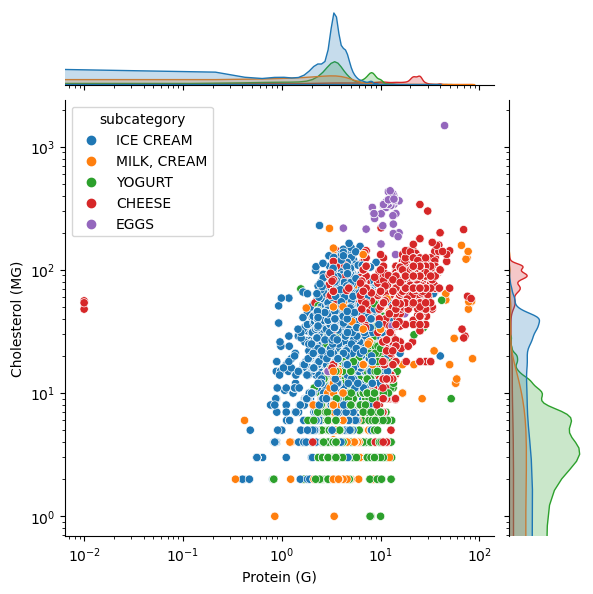

In [16]:
# EGGS, DAIRY, DAIRY SUBSTITUTES: Cholesterol vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'EGGS, DAIRY, DAIRY SUBSTITUTES'
sns.jointplot(data=brand_food_nutrients[subset], x='Protein (G)', y='Cholesterol (MG)', hue='subcategory')
plt.xscale('log')
plt.yscale('log')

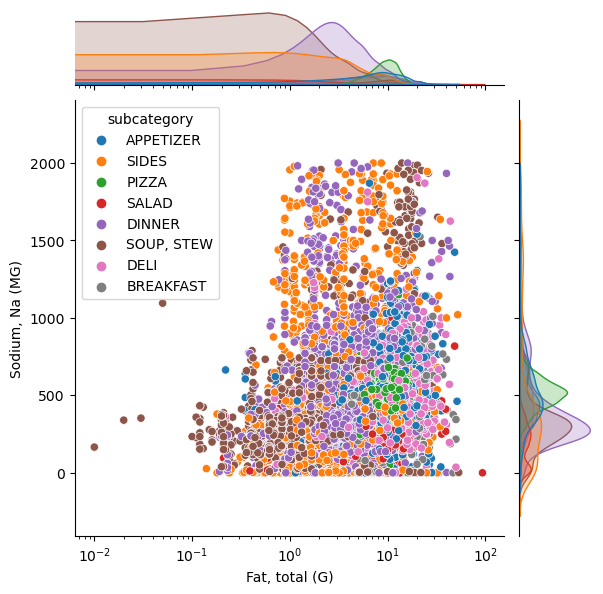

In [17]:
# PREPARED FOODS/MEALS: Cholesterol vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'PREPARED FOODS/MEALS'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Sodium, Na (MG)', hue='subcategory')
plt.xscale('log')
# plt.yscale('log')

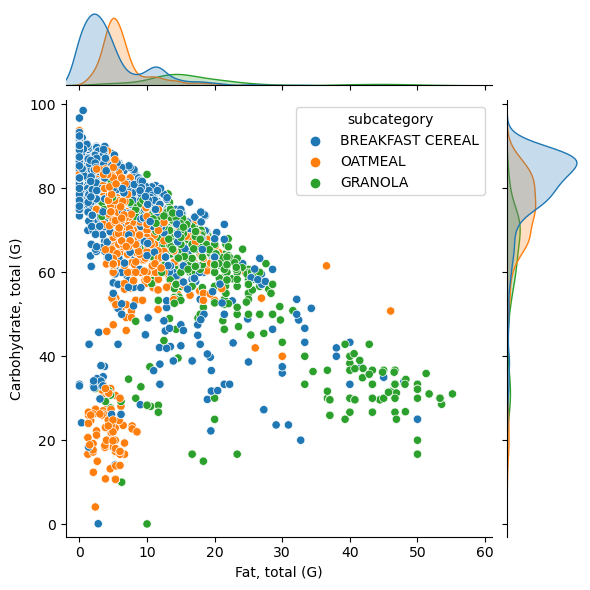

In [18]:
# CEREAL: Sugar vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'CEREAL'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Carbohydrate, total (G)', #y='Sugars, total (G)', 
              hue='subcategory', xlim=(-2, 61), ylim=(-3,101))
# plt.xscale('log')
# plt.yscale('log')

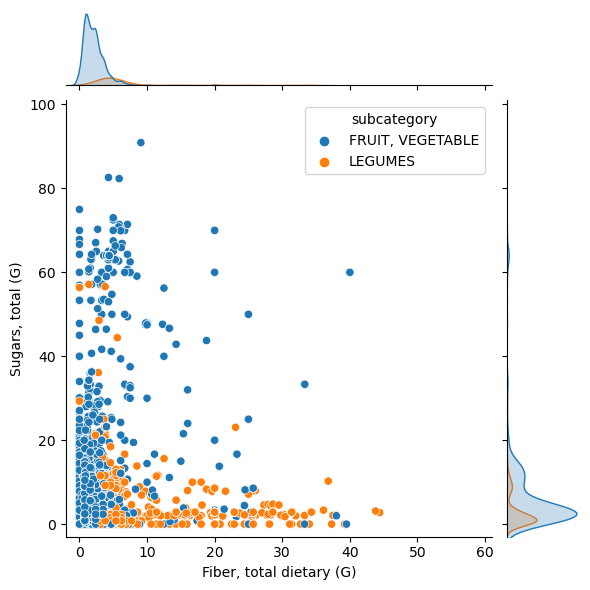

In [19]:
# FRUITS, VEGETABLES, LEGUMES: sugar vs. fiber for 100g portion
subset = brand_food_nutrients['category'] == 'FRUITS, VEGETABLES, LEGUMES'
sns.jointplot(data=brand_food_nutrients[subset], x='Fiber, total dietary (G)', y='Sugars, total (G)', 
              hue='subcategory', xlim=(-2, 61), ylim=(-3,101))
# plt.xscale('log')
# plt.yscale('log')

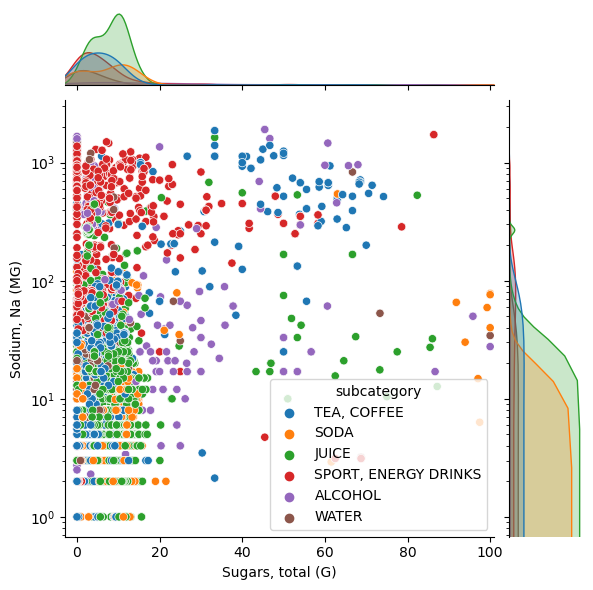

In [20]:
# DRINKS: sodium vs. sugar for 100g portion
subset = brand_food_nutrients['category'] == 'DRINKS (NON-DAIRY)'
# subset = brand_food_nutrients['category'] == 'CEREAL'
sns.jointplot(data=brand_food_nutrients[subset], x='Sugars, total (G)', y='Sodium, Na (MG)', 
              hue='subcategory', xlim=(-3, 101), ylim=None)
# plt.xscale('log')
plt.yscale('log')

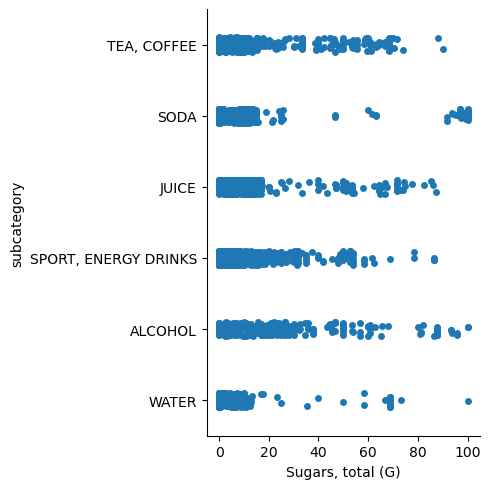

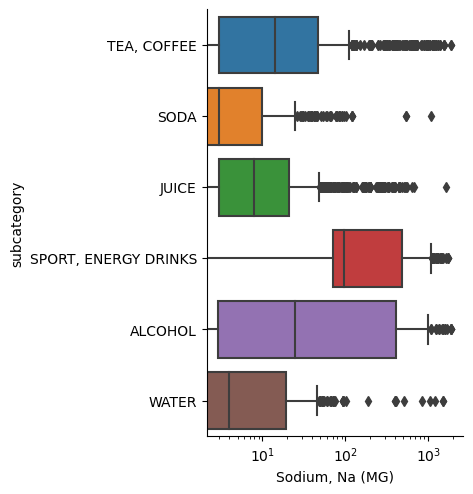

In [21]:
# alternate plots for sugar and sodium in drinks
subset = brand_food_nutrients['category'] == 'DRINKS (NON-DAIRY)'

sns.catplot(data=brand_food_nutrients[subset], x='Sugars, total (G)', y='subcategory')
# plt.xscale('log')
# plt.yscale('log')

sns.catplot(data=brand_food_nutrients[subset], x='Sodium, Na (MG)', y='subcategory', kind='box')
plt.xscale('log')
# plt.yscale('log')

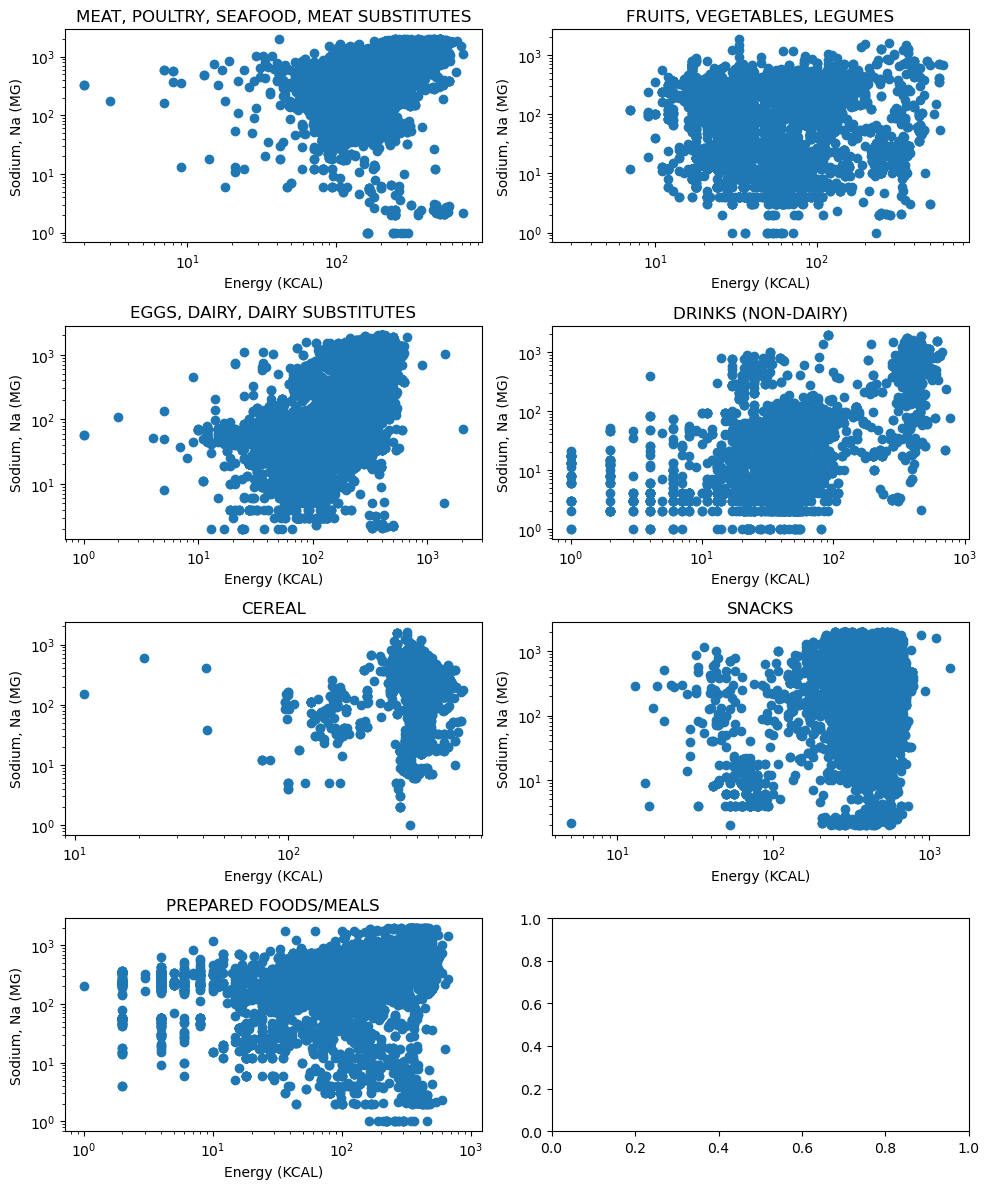

In [22]:
# plot sodium vs energy for 100g portion
fig, ax = plt.subplots(4, 2, figsize=(10,12))
axs = ax.ravel()

for i, cat in enumerate(categories):
    catmask = brand_food_nutrients['category'] == cat
    x = brand_food_nutrients.loc[catmask, 'Energy (KCAL)']
    y = brand_food_nutrients.loc[catmask, 'Sodium, Na (MG)']

    axs[i].plot(x, y, 'o')
    axs[i].set_title(f'{cat}')
    axs[i].set_xlabel('Energy (KCAL)')
    axs[i].set_ylabel('Sodium, Na (MG)')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
fig.tight_layout()

In [23]:
brand_food_nutrients.to_csv('cleaned_brand_food_nutrients.csv', index=False)